In [1]:
from load_rhd import *
from quick_extract import *
from get_data import *
import PostProcessing.tools.heatmap as hm
from get_data import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from utils_tonotopy import *
from load_rhd import *
from quick_extract import *
from get_data import *
import PostProcessing.tools.heatmap as hm
from get_data import *
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from tonotopy import *
from one_condition import *


In [2]:
sampling_rate = 30000

In [3]:
path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240426_SESSION_00/'
save_path = path

In [ ]:
extract_from_rhd(path, sampling_rate)

In [ ]:
copy_files(path)

In [ ]:
get_session_type(path)

In [4]:
spk, an_times, tones_total, frequencies = get_tonotopy_basics(path+'headstage_1/')

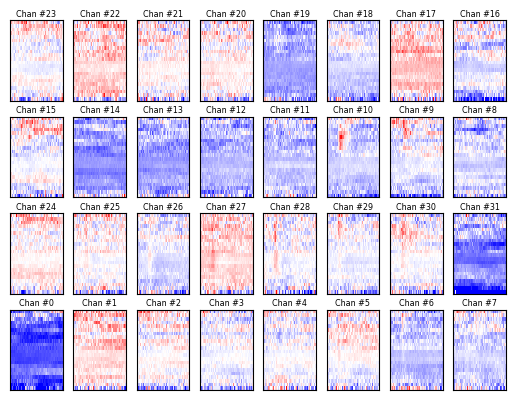

In [5]:
hm_tonotopy = hm.Heatmap()
hm_tonotopy.compute_heatmap(trigs=an_times, tone_sequence=tones_total, spikes=spk, t_pre=0.100, t_post=0.450,
                                 bin_size=0.002)
heatmap = hm_tonotopy
tones = heatmap.get_tones()
heatmaps = heatmap.plot(32, "tono", folder=None, cmap="bwr", l_ex=None, r_ex=None, ext="png")


nan nan
nan nan
nan nan
nan nan
nan nan
[67.         66.         65.         64.         63.         62.63129315
 63.         63.18154553 64.         65.         66.         67.
 67.24272484 67.53716018 67.        ] [9.24680467 9.5063422  9.65107778 9.74314971 9.33102113 9.
 8.4333105  8.         7.49064105 7.34081548 7.55503291 7.85927344
 8.         9.         9.24680467]
[69.         68.32240221 68.         67.77031328 67.         66.
 65.         64.21548784 64.         63.92362008 64.         64.67689027
 65.         66.         67.         68.         69.         70.
 71.         71.17455139 71.39356344 71.         70.         69.12292239
 69.        ] [10.05670804 10.          9.97671821 10.         10.05724441 10.03939911
 10.30082965 10.          9.2204756   9.          8.92646539  8.
  7.8447458   7.80724024  7.50073497  7.62528437  7.55158612  7.64282643
  7.89213867  8.          9.          9.27186131  9.62827254 10.
 10.05670804]
nan nan
nan nan
[80.         79.         78

NameError: name 'folder' is not defined

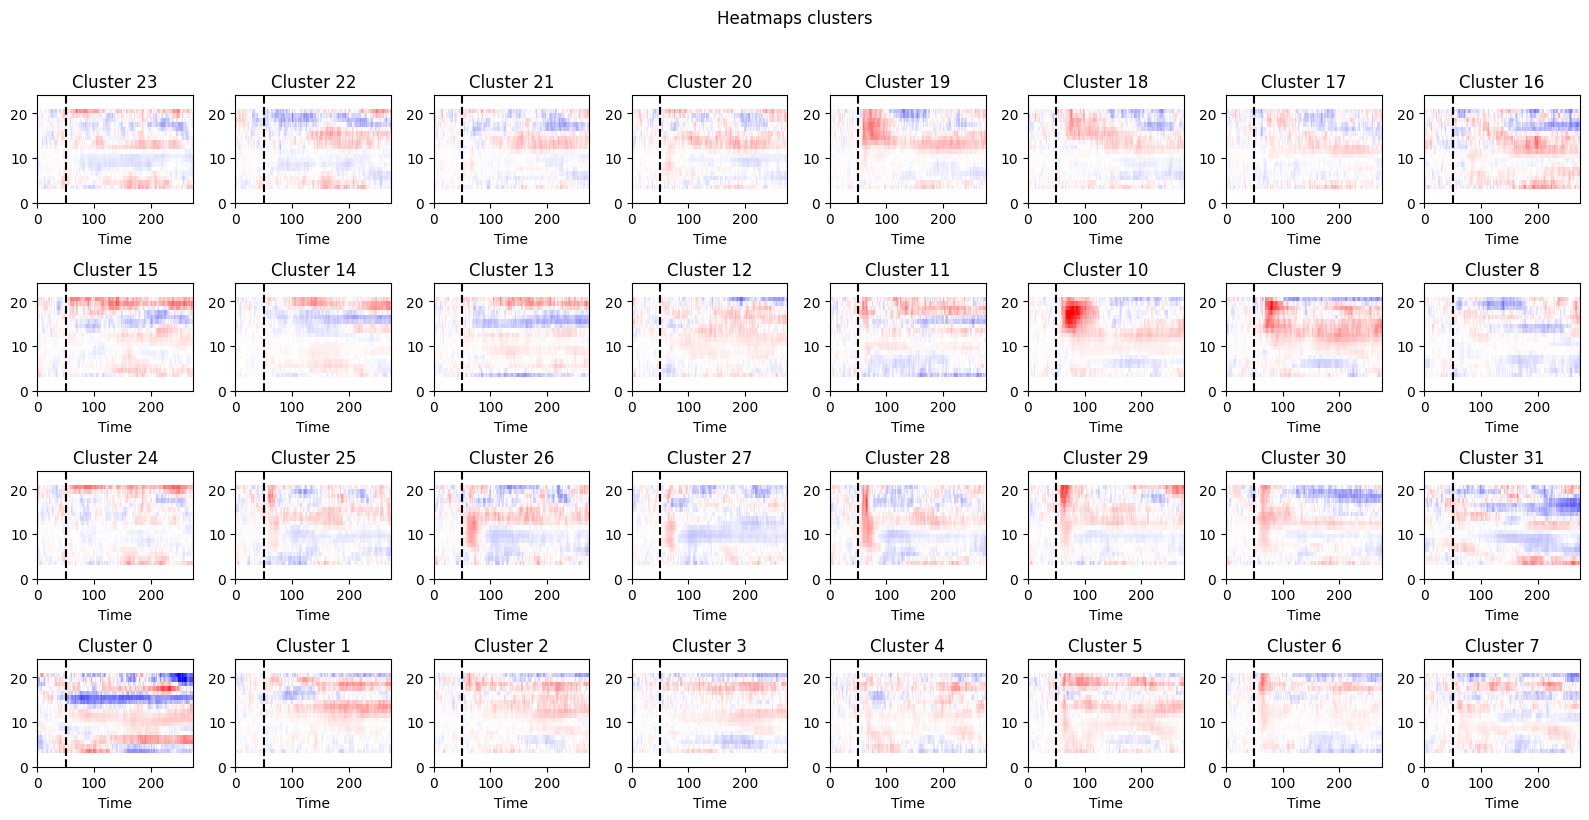

In [6]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5

psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)

plot_heatmap_bandwidth(heatmaps,3.7, gc,frequencies, 2, 2, bin_width, psth_bins, t_pre, path, 'playback')

In [ ]:
load_rhd(path+'ephys.rhd', save_path, digital=True, analog=True, accelerometer=True, filtered=True, export_to_dat=False)

In [ ]:
neural_data = np.load(path + 'filtered_neural_data.npy')
neural_data_2 = neural_data[32:64]

In [ ]:
filter_and_cmr(neural_data_2, sampling_rate, save_path)

In [ ]:
quick_extract(path+'/refiltered_neural_data.npy')

In [ ]:
spk, an_times, tones_total, frequencies = get_tonotopy_basics(path)

In [ ]:
hm_tonotopy = hm.Heatmap()
hm_tonotopy.compute_heatmap(trigs=an_times, tone_sequence=tones_total, spikes=spk, t_pre=0.100, t_post=0.450,
                                 bin_size=0.002)
heatmap = hm_tonotopy
tones = heatmap.get_tones()
heatmaps = heatmap.plot(32, "tono", folder=None, cmap="bwr", l_ex=None, r_ex=None, ext="png")


In [ ]:
def get_plot_coords(channel_number):
    """
    Fonction qui calcule la position en 2D d'un canal sur une Microprobe.
    Retourne la ligne et la colonne.
    """
    if channel_number in list(range(8)):
        row = 3
        col = channel_number % 8

    elif channel_number in list(range(8, 16)):
        row = 1
        col = 7 - channel_number % 8

    elif channel_number in list(range(16, 24)):
        row = 0
        col = 7 - channel_number % 8

    else:
        row = 2
        col = channel_number % 8

    return row, col

In [ ]:
##test



def plot_heatmap_bandwidth_v2(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, path, bin_width, psth_bins, t_pre, condition):
    """""
    Best function pour déterminer la bandwidth et plotter la heatmap et les contours de la bandwidth
    input : heatmaps(contenant plusieurs clusters), le threshold pour la detection du pic, good_clusters
        unique_tones (les fréquences jouées), min_freq, max_freq : les indices des fréquences qu'on exclut (pas assez de présentations)
        condition : 'tracking' ou 'playback'
    output : save plot des heatmap avec la bandwidth entourée .png
            save tableau des heatmaps telles que plottée (avec les psth) .npy
            save tableau contenant les bandwidth de chaque cluster .npy
            
    """
    
    # pour les plots:

    #num_rows, num_columns = get_plot_geometry(gc)
    
    num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
    fig.suptitle('Heatmaps clusters', y=1.02)
    plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
    if num_rows > 1 and num_columns > 1:
        axes = axes.flatten()
    #
    bandwidth = []
    plotted_heatmap = []
    peaks = []
    for cluster, ax in enumerate(axes):
        if cluster < num_plots:
            #print(cluster)
            heatmap_cluster = np.array(heatmaps[cluster])
            hm, peak = detect_peak(heatmaps, cluster)
            #heatmap_min = np.min(heatmap_cluster)
            #heatmap_max = np.max(abs(heatmap_cluster))
            #abs_max = max(abs(heatmap_min), abs(heatmap_max))
            #abs_max = np.max(abs(heatmap_cluster[min_freq:-max_freq]))
            abs_max = np.max(abs(heatmap_cluster[3:-3]))
            contours = get_contour(hm, threshold)
            
        # Je retire la moyenne pre-stim ligne par ligne (fréquence par fréquence)
            t_0 = int(t_pre/bin_width)
            prestim_hm = heatmap_cluster[:, :t_0]
            mean_freq = np.mean(prestim_hm, axis=1)

            for i in range(heatmap_cluster.shape[0]):  # Parcours des lignes de A
                heatmap_cluster[i] -= mean_freq[i]
            
            
            smoothed = smooth_2d(heatmap_cluster, 3)
            
            #je mets des zeros aux frequences trop hautes et trop basses où je n'ai pas
            #assez de présentations
            lowf = np.zeros((min_freq+1, len(psth_bins[:-1])))
            highf = np.zeros((max_freq+1, len(psth_bins[:-1])))
            
            milieu = np.concatenate((lowf, smoothed[min_freq:-max_freq]))

            # Concaténation à l'arrière
            milieu = np.concatenate((milieu, highf))
            
            row, col = get_plot_coords(cluster)

            img = axes[row, col].pcolormesh(milieu, cmap=create_centered_colormap(), vmin=-abs_max, vmax=abs_max)
            axes[row, col].set_yticks(np.arange(len(unique_tones)), unique_tones)
            axes[row, col].set_xlabel('Time')
            axes[row, col].set_ylabel('Frequency [Hz]')
            axes[row, col].set_title(f'Cluster {gc[cluster]}')
            axes[row, col].axvline(x=t_0, color='black', linestyle='--') # to print a vertical line at the stim onset time
        

            #Je ne prends la réponse qu'entre 40 et 60ms
            #max = 0
            #min = len(unique_tones[min_freq:-max_freq])-2
            max_length =  0    
            x_c, y_c, minf, maxf = np.nan, np.nan, 0,0 # au cas où on trouve pas de contour
            for contour in contours:
                if ((contour[:, 1] > 40).all() and (contour[:, 1] < 60).all()):
                    if len(contour[:, 0])>max_length:
                        max_length = len(contour[:, 0])
                        x_c = contour[:, 1]
                        y_c = contour[:, 0]
                        maxf = np.max(contour[:, 0])
                        minf = np.min(contour[:, 0])
                        test = contour[:, 0]
                        if maxf<len(unique_tones)-1:
                            maxf+=1
            #ax.plot(x_c, y_c, linewidth=2, color='green')
            #print(plotted_freq[int(min)], plotted_freq[int(max)])
            # je mets np.nan dans bandwidth si je ne trouve pas de contour
            if max_length==0 or maxf==0:
                bandwidth.append([np.nan, np.nan])
                peaks.append(np.nan)
            else : 
            
            #je prends +1 dans le maxf
                bandwidth.append([unique_tones[int(minf)], unique_tones[int(maxf)]])
                peaks.append(unique_tones[peak[0]])
            plotted_heatmap.append(milieu)
            #cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
            #fig.colorbar(img, cax=cbar_ax)
        # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')
    plt.tight_layout()  
    return ('all izz well')

In [ ]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.01
t_pre = 0.1
t_post = 0.5

psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)


In [ ]:
first_half = get_spikes_cluster(28, spk, t_pre, t_post, bin_width, an_times[0:1500], tones_total[0:1500])
second_half = get_spikes_cluster(28,spk, t_pre, t_post, bin_width, an_times[1500:3000], tones_total[1500:3000])

In [ ]:
clus=28
num_plots, num_rows, num_columns = get_better_plot_geometry(first_half)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle(f'psth cluster {clus} left per frequency’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for freq, ax in enumerate(axes):
    if freq < num_plots:
        ax.plot(np.nanmean(first_half[freq], axis=0), c = 'green', label = 'first half of session')
        ax.plot(np.nanmean(second_half[freq], axis=0), c = 'orange', label = 'second half of session')
        ax.axvline(t_0, c = 'black')
        ax.set_title(f'Frequency {freq}')
        ax.legend()
for ax in axes[num_plots:]:
    ax.axis('off')
#plt.savefig(path+f'left_cluster_{clus}.png')
plt.show()

In [ ]:

num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('psth cluster left’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for clus, ax in enumerate(axes):
    if clus < num_plots:
        first_half = get_spikes_cluster(clus, spk, t_pre, t_post, bin_width, an_times[0:1500], tones_total[0:1500])
        second_half = get_spikes_cluster(clus,spk, t_pre, t_post, bin_width, an_times[1500:3000], tones_total[1500:3000])
        ax.plot(np.nanmean(np.vstack(first_half), axis=0), c = 'green')
        ax.plot(np.nanmean(np.vstack(second_half), axis=0), c = 'orange')
        ax.set_title(f'Cluster {clus}')
        ax.axvline(t_0, c = 'black')
for ax in axes[num_plots:]:
    ax.axis('off')
#plt.savefig(path+'psth_cluster_RIGHT.png')
plt.show()

In [ ]:
plt.plot(an_times)

In [ ]:

spk = ut.Spikes(path)
an_triggers = np.load(os.path.join(path, "analog_in.npy"))
an_times = ut.extract_analog_triggers_compat(an_triggers[0])
frequencies, tones_total, triggers_spe, tag = get_data(path, trigs=an_times)
l_spikes = list()

In [ ]:
hm_tonotopy = hm.Heatmap()
hm_tonotopy.compute_heatmap(trigs=an_times, tone_sequence=tones_total, spikes=spk, t_pre=0.100, t_post=0.450,
                                 bin_size=0.002)

In [ ]:
heatmap = hm_tonotopy
tones = heatmap.get_tones()
heatmaps = heatmap.plot(32, "tono", folder=None, cmap="bwr", l_ex=None, r_ex=None, ext="png")


In [ ]:
def plot_heatmap_bandwidth2(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre, path):
    """""
    Best function pour déterminer la bandwidth et plotter la heatmap et les contours de la bandwidth
    input : heatmaps(contenant plusieurs clusters), le threshold pour la detection du pic, good_clusters
        unique_tones (les fréquences jouées), min_freq, max_freq : les indices des fréquences qu'on exclut (pas assez de présentations)
        condition : 'tracking' ou 'playback'
    output : save plot des heatmap avec la bandwidth entourée .png
            save tableau des heatmaps telles que plottée (avec les psth) .npy
            save tableau contenant les bandwidth de chaque cluster .npy
            
    """
    
    # pour les plots:

    #num_rows, num_columns = get_plot_geometry(gc)
    
    num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
    fig.suptitle('Heatmaps clusters', y=1.02)
    plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
    if num_rows > 1 and num_columns > 1:
        axes = axes.flatten()
    #
    bandwidth = []
    plotted_heatmap = []
    peaks = []
    for cluster, ax in enumerate(axes):
        if cluster < num_plots:
            #print(cluster)
            heatmap_cluster = np.array(heatmaps[cluster])
            hm, peak = detect_peak(heatmaps, cluster)
            #heatmap_min = np.min(heatmap_cluster)
            #heatmap_max = np.max(abs(heatmap_cluster))
            #abs_max = max(abs(heatmap_min), abs(heatmap_max))
            #abs_max = np.max(abs(heatmap_cluster[min_freq:-max_freq]))
            abs_max = np.max(abs(heatmap_cluster[3:-3]))*0.3
            contours = get_contour(hm, threshold)
            
        # Je retire la moyenne pre-stim ligne par ligne (fréquence par fréquence)
            t_0 = int(t_pre/bin_width)
            prestim_hm = heatmap_cluster[:, :t_0]
            mean_freq = np.mean(prestim_hm, axis=1)

            for i in range(heatmap_cluster.shape[0]):  # Parcours des lignes de A
                heatmap_cluster[i] -= mean_freq[i]
            
            
            smoothed = smooth_2d(heatmap_cluster, 3)
            
            #je mets des zeros aux frequences trop hautes et trop basses où je n'ai pas
            #assez de présentations
            lowf = np.zeros((min_freq+1, len(smoothed[0])))
            highf = np.zeros((max_freq+1, len(smoothed[0])))
            
            milieu = np.concatenate((lowf, smoothed[min_freq:-max_freq]))

            # Concaténation à l'arrière
            milieu = np.concatenate((milieu, highf))
            
            
            img = ax.pcolormesh(milieu, cmap=create_centered_colormap(abs_max), vmin=-abs_max, vmax=abs_max)
            ax.set_yticks(np.arange(len(unique_tones)), unique_tones)
            ax.set_xlabel('Time')
            ax.set_ylabel('Frequency [Hz]')
            ax.set_title(f'Cluster {gc[cluster]}')
            ax.axvline(x=t_0, color='black', linestyle='--') # to print a vertical line at the stim onset time
        

            #Je ne prends la réponse qu'entre 40 et 60ms
            #max = 0
            #min = len(unique_tones[min_freq:-max_freq])-2
            max_length =  0    
            x_c, y_c, minf, maxf = np.nan, np.nan, 0,0 # au cas où on trouve pas de contour
            for contour in contours:
                if ((contour[:, 1] > 40).all() and (contour[:, 1] < 60).all()):
                    if len(contour[:, 0])>max_length:
                        max_length = len(contour[:, 0])
                        x_c = contour[:, 1]
                        y_c = contour[:, 0]
                        maxf = np.max(contour[:, 0])
                        minf = np.min(contour[:, 0])
                        test = contour[:, 0]
                        if maxf<len(unique_tones)-1:
                            maxf+=1
            ax.plot(x_c, y_c, linewidth=2, color='green')
            #print(plotted_freq[int(min)], plotted_freq[int(max)])
            # je mets np.nan dans bandwidth si je ne trouve pas de contour
            if max_length==0 or maxf==0:
                bandwidth.append([np.nan, np.nan])
                peaks.append(np.nan)
            else : 
            
            #je prends +1 dans le maxf
                bandwidth.append([unique_tones[int(minf)], unique_tones[int(maxf)]])
                peaks.append(unique_tones[peak[0]])
            plotted_heatmap.append(milieu)
            #cbar_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.02, ax.get_position().height])
            #fig.colorbar(img, cax=cbar_ax)
        # Hide any unused subplots
    for ax in axes[num_plots:]:
        ax.axis('off')
    plt.tight_layout()  
    plt.savefig(path+f'/heatmap_tracking.png') # save the figure of the heatmap
    #np.save(path+folder+f'/heatmap_bandwidth_{condition}.npy', bandwidth) # save the values of the bandwidth
    #np.save(path+folder+f'/heatmap_plot_{condition}.npy',plotted_heatmap ) # save the values of the heatmap as it is plotted 
    #np.save(path+folder+f'/best_frequency_{condition}.npy', peaks)
    return ('all izz well')

In [ ]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5

psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)


plot_heatmap_bandwidth2(heatmaps,3.7, gc,frequencies, 3, 3, bin_width, psth_bins, t_pre, path)

#plot_heatmap_bandwidth_tonotopy(heatmaps,3.7, gc,frequencies,3, -4, t_pre=0.1, t_post=0.5, bin_width=0.01)

In [ ]:

spk = ut.Spikes(path)
an_triggers = np.load(os.path.join(path, "analog_in.npy"))
an_times = ut.extract_analog_triggers_compat(an_triggers[0])
frequencies, tones_total, triggers_spe, tag = get_data(path, trigs=an_times)
l_spikes = list()

In [ ]:
gc = np.arange(start=0, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)

In [ ]:
def psth(spikes, triggers, t_0=0.2, t_1=0.5, bin_size=0.01, bins=None, trigger_unit="seconds", fs=30e3):
    """

    """
    x = raster(spikes, triggers, t_0, t_1, trigger_unit, fs)
    if len(x) == 0:
        return None, None
    x = np.hstack(x)
    if bins is None:
        bins = np.arange(t_0, t_1 + bin_size, bin_size)
    h, b = np.histogram(x, bins)
    h = h.astype(dtype=np.float64)
    h /= (len(triggers) * bin_size)  # donne l'activité
    return h, b

In [ ]:
def process_list(lst):
    # Trouver l'index du premier et dernier True
    first_true = next((i for i, x in enumerate(lst) if x), None)
    last_true = next((i for i, x in enumerate(lst[::-1]) if x), None)
    
    last_true = len(lst) - last_true - 1 if last_true is not None else None
    # Transformer le False entouré de True en un True
    for i in range(first_true + 1, last_true):
        if lst[i-1] and lst[i+1] and not lst[i]:
            lst[i] = True
    return lst

In [ ]:
def get_spikes_cluster(cluster, t_pre, t_post, bin_width, trigs, tone_sequence):
    x = spk.get_spike_times(cluster=cluster)
    hist = list()
    #trigs=an_times
    tones, counts = np.unique(tones_total, return_counts=True)
    idx = process_list(list(np.greater(counts, 10)))
    tones = tones[idx]
    idx = np.arange(0, len(tones), dtype=int)
    t_0 = t_pre/bin_width
    all_tones_psth=[]
    for tone in tones:
        tone_idx = np.where(tones_total == tone)[0]
        trigger_time = trigs[tone_idx]
        h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=psth_bins)
        hist = list(hist)
        hist.append(h)
        if len(hist) > 0:
            hist = np.vstack(hist)
        else:
            hist = np.zeros((len(tones), len(psth_bins)))
        psths = hist
        all_tones_psth.append(psths)
        
        #plt.axvline(t_0)
        #plt.plot(np.nanmean(psths, axis=0))
        #plt.title(f'Frequency {tone} [Hz]')
        #plt.show()
    #plt.plot(np.nanmean(np.vstack(all_tones_psth), axis=0))
    #plt.axvline(t_0, c = 'black')
    #plt.title(f'Cluster {cluster}')
    #plt.show()
    return all_tones_psth

In [ ]:
len(all_tones_psth)

In [ ]:
clus = 8
all_tones_psth =  get_spikes_cluster(clus, t_pre, t_post, bin_width, an_times, tones_total)


num_plots, num_rows, num_columns = get_better_plot_geometry(all_tones_psth)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle(f'psth cluster {clus} left per frequency’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for freq, ax in enumerate(axes):
    if freq < num_plots:
        ax.plot(np.nanmean(all_tones_psth[freq], axis=0))
        ax.axvline(t_0, c = 'black')
        ax.set_title(f'Frequency {freq}')
for ax in axes[num_plots:]:
    ax.axis('off')
    plt.savefig(path+f'left_cluster_{clus}.png')
plt.show()
        

In [ ]:
get_better_plot_geometry(gc)
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('psth cluster left’', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
    
t_0 = t_pre/bin_width
for clus, ax in enumerate(axes):
    if clus < num_plots:
        psth_clus = get_spikes_cluster(clus, t_pre, t_post, bin_width, an_times, tones_total)
        ax.plot(np.nanmean(np.vstack(psth_clus), axis=0))
        ax.set_title(f'Cluster {clus}')
        ax.axvline(t_0, c = 'black')
for ax in axes[num_plots:]:
    ax.axis('off')
#plt.savefig(path+'psth_cluster_RIGHT.png')
plt.show()
        

In [ ]:
for cluster in gc:
    x = spk.get_spike_times(cluster=cluster)
    hist = []
    trigs=an_times
    tones, counts = np.unique(tones_total, return_counts=True)
    all_tones_psths = []
    for tone in tones:
        tone_idx = np.where(tones_total == tone)[0]
        trigger_time = trigs[tone_idx]
        h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=psth_bins)
        hist = list(hist)
        hist.append(h)
        if len(hist) > 0:
            hist = np.vstack(hist)
        else:
            hist = np.zeros((len(tones), len(psth_bins)))

        psths = hist
        all_tones_psths.append(psths)
        
    plt.plot(np.nanmean(np.vstack(psths), axis=0))
    plt.title(f'cluster {cluster} ')
    
    plt.show()

In [ ]:

tones, counts = np.unique(tone_sequence, return_counts=True)
        #idx = process_list(list(np.greater(counts, 30)))
idx = process_list(list(np.greater(counts, 10)))
        # print(list(np.greater(counts, 30)), idx)
        self.tones = tones[idx]
        self.idx = np.arange(0, len(self.tones), dtype=int)
        clusters = list()
        for cluster in range(spikes.get_n_clusters()):
            clusters.append(cluster)
            x = spikes.get_spike_times(cluster=cluster)
            hist = list()
            for tone in self.tones:
                tone_idx = np.where(tone_sequence == tone)[0]
                trigger_time = trigs[tone_idx]
                h, _ = psth(x, trigger_time, t_0=t_pre, t_1=t_post, bins=self.bins)
                hist.append(h)
            if len(hist) > 0:
                hist = np.vstack(hist)
            else:
                hist = np.zeros((len(self.tones), len(self.bins)))

            self.psths[cluster] = hist
        self.clusters = np.array(clusters, dtype=int)
        self.empty = False

In [ ]:
for clus in gc:
    plt.plot(np.nanmean(heatmaps[clus], axis=0))
    t_0 = int(t_pre/bin_width)
    plt.axvline(t_0, c = 'black')
    plt.show()

In [ ]:
import random

# Générer 10 chiffres aléatoires entre 0 et 50000
random_numbers = [random.randint(0, 50000) for _ in range(10)]

l_psth=[psth[i] for i in random_numbers ]



plt.plot(np.nanmean(l_psth, axis=0))

In [ ]:
fs=30000
from utils import *
sig = np.load(path+'refiltered_neural_data.npy')
gc = np.arange(start=22, stop=32, step=1)
bin_width = 0.002
t_pre = 0.1
t_post = 0.5
get_better_plot_geometry(gc)
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(24, 18))
fig.suptitle('Heatmaps clusters', y=1.02)
plt.subplots_adjust() 
    
     # Flatten the axis array if it's more than 1D
if num_rows > 1 and num_columns > 1:
    axes = axes.flatten()
all_psth = []
for clus, ax in enumerate(axes):
    if clus < num_plots:
        idx_clus = indices_valeurs_egales(spk_clus, clus)
        spk_2 = spk_times[idx_clus]
        psth = []
        for i in range(len(spk_2)):
            t = spk_2[i]
            tpre = int(t-50)
            tpost = int(t+100)
            if len(sig[clus][tpre:tpost])==150:
                psth.append(sig[clus][tpre:tpost])
        
        ax.plot((np.nanmean(psth, axis=0)))
        #ax.set_yticks(np.arange(len(unique_tones)), unique_tones)
        ax.set_xlabel('Time')
        #ax.set_ylabel('Frequency [Hz]')
        ax.set_title(f'Cluster {gc[clus]}')
    all_psth.append(psth)
for ax in axes[num_plots:]:
    ax.axis('off')
plt.savefig(path+'psth_cluster_RIGHT.png')
plt.show()

In [ ]:
clus=15
idx_clus = indices_valeurs_egales(spk_clus, clus)
spk_2 = spk_times[idx_clus]
psth = []
for i in range(len(spk_2)):
    t = spk_2[i]
    tpre = int(t-50)
    tpost = int(t+100)
    if len(sig[clus][tpre:tpost])==150:
        psth.append(sig[clus][tpre:tpost])
        
plt.plot((np.nanmean(psth, axis=0)))

In [ ]:
fs=30000
t = spk_2[25]

tpre = int(t-50)
print(tpre)
tpost = int(t+50)
print(tpost)
sig = np.load(path+'/refiltered_neural_data.npy')

plt.plot(sig[2][tpre:tpost])

In [ ]:
len(sig[2])